<a href="https://colab.research.google.com/github/Hitaishree1/Hitaishree1/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression  handson

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("bank-additional-full_final.csv",sep=";")

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41194,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41195,74.0,NaN,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41196,74.0,retired,married,NaN,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Problem statement

Above is the details of customers of bank with name xyz. the xyz bank have launched a new service in the bank (eg. edu.loan, buisness loan, home loan etc) AIm: build a classification model that can predict whether the customer will choose the service or not

# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [ ]:
# checking with null values -
df.isnull().sum()

age               4
job               5
marital           5
education         5
default           4
housing           3
loan              4
contact           4
month             3
day_of_week       3
duration          3
campaign          3
pdays             3
previous          3
poutcome          5
emp.var.rate      3
cons.price.idx    4
cons.conf.idx     3
euribor3m         3
nr.employed       3
y                 3
dtype: int64

In [ ]:
df.isnull().sum().sum()

76

In [ ]:
# if the null values < 10% -----dropping
# else
# if the null values are more :
#                  scattered- replace
#                  clustered - dropping

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41193,94.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [ ]:
df.duplicated().sum()

13

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [ ]:
df.duplicated().sum()

0

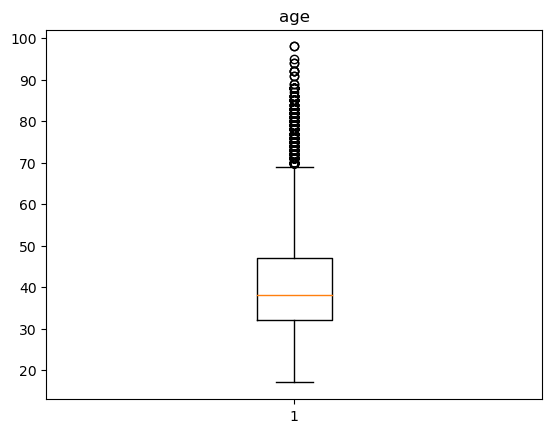

In [ ]:
# Outlier analysis
plt.boxplot(df["age"])
plt.title("age")
plt.show()

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

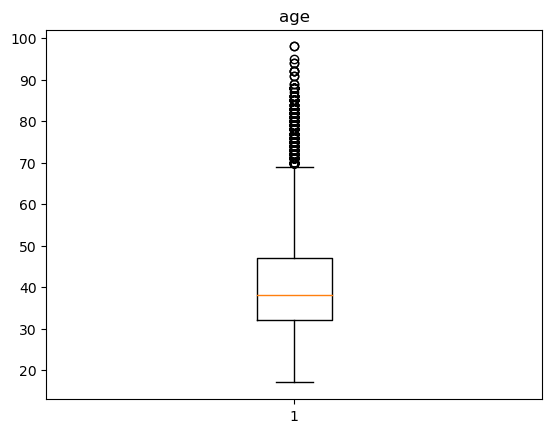

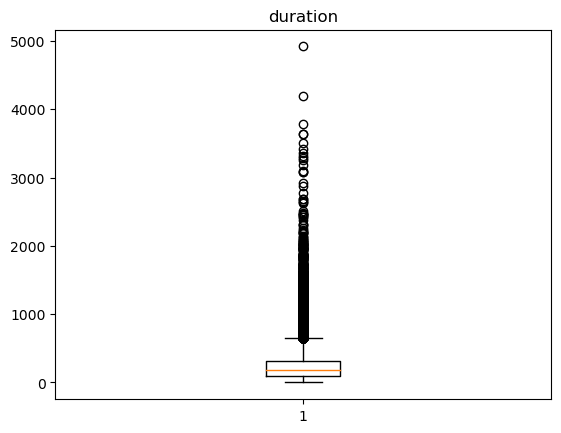

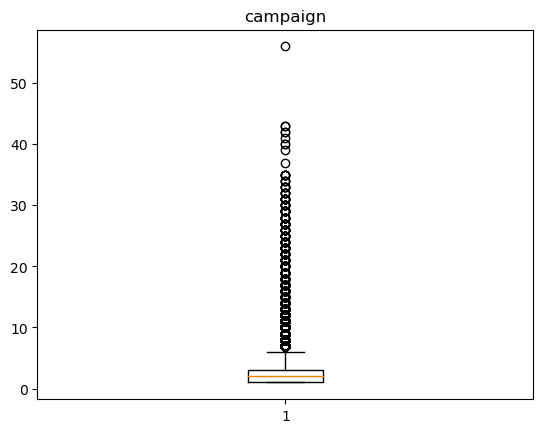

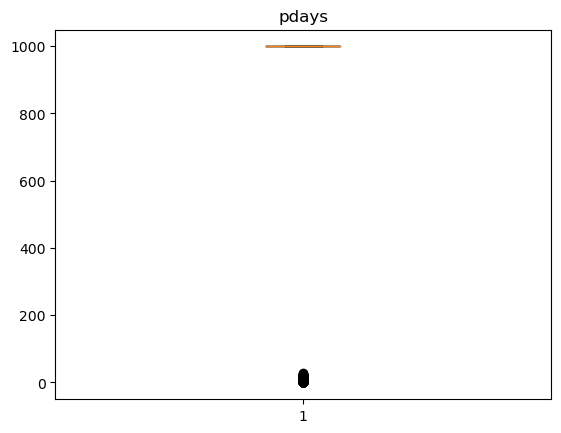

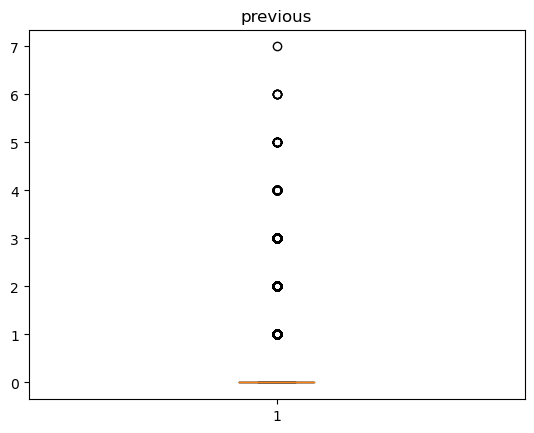

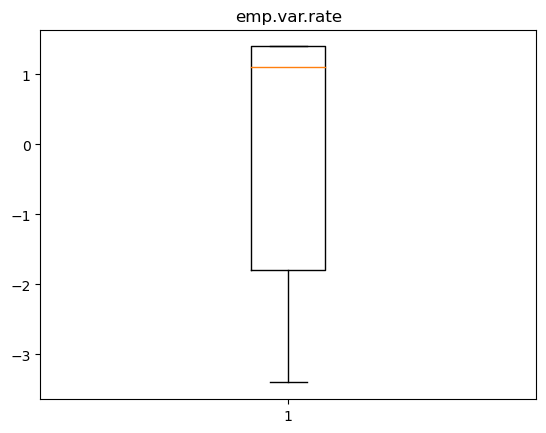

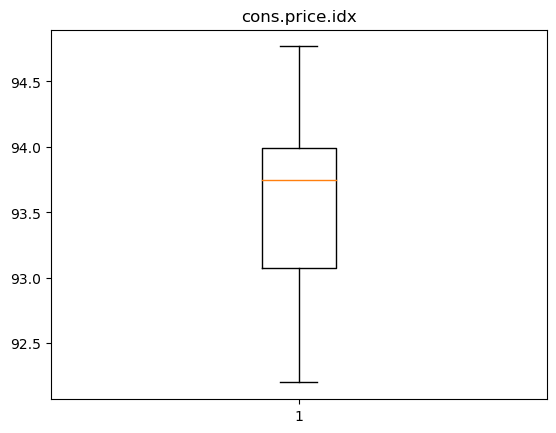

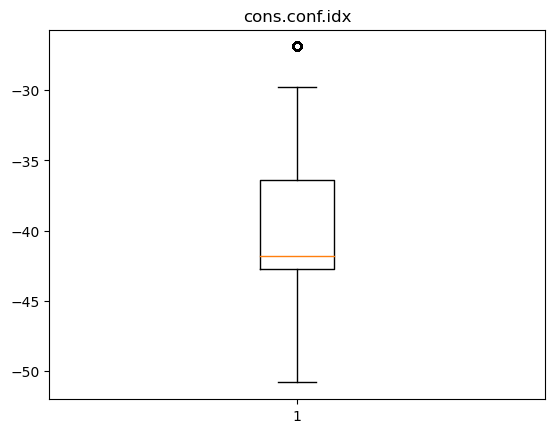

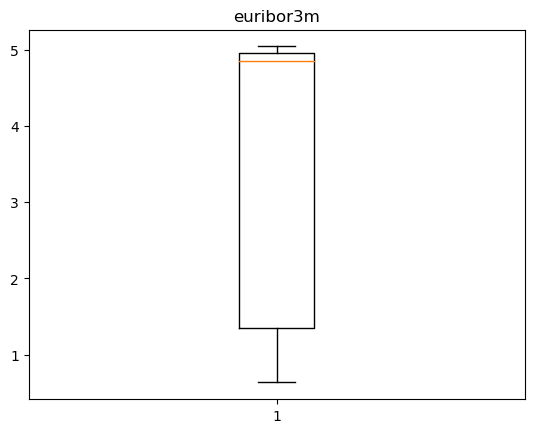

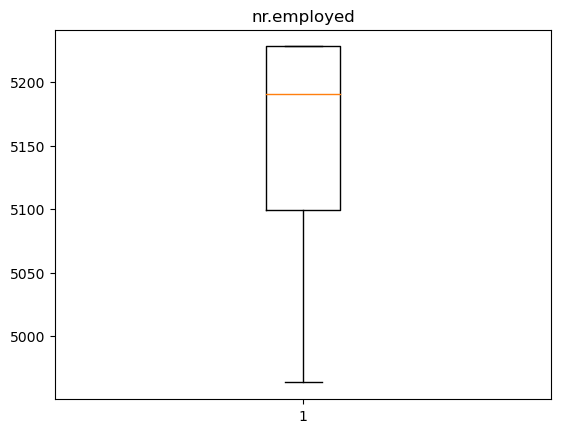

In [ ]:
for col in df.columns:
    if  df[col].dtype!="object":
        plt.boxplot(df[col])
        plt.title(col)
        plt.show()

In [ ]:
out_cols=['age', 'duration', 'campaign','cons.conf.idx']

In [ ]:
df["pdays"].value_counts() #exceptional columns

999.0    39662
3.0        439
6.0        412
4.0        118
9.0         64
2.0         61
7.0         60
12.0        58
10.0        52
5.0         46
13.0        36
11.0        28
1.0         26
15.0        24
14.0        20
8.0         18
0.0         15
16.0        11
17.0         8
18.0         7
22.0         3
19.0         3
21.0         2
25.0         1
26.0         1
27.0         1
20.0         1
Name: pdays, dtype: int64

In [ ]:
39662/41177

0.9632076159020813

In [ ]:
df["previous"].value_counts() #exceptional columns

0.0    35551
1.0     4562
2.0      754
3.0      216
4.0       70
5.0       18
6.0        5
7.0        1
Name: previous, dtype: int64

In [ ]:
# Outlier Removal
out_cols

['age', 'duration', 'campaign', 'cons.conf.idx']

In [ ]:
for col in out_cols:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    LL=Q1-1.5*IQR
    UL=Q3+1.5*IQR
    df=df[(df[col]>=LL)&(df[col]<=UL)]

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37.0,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29.0,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1.0,9.0,1.0,success,-1.1,94.767,-50.8,1.028,4963.6,no
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


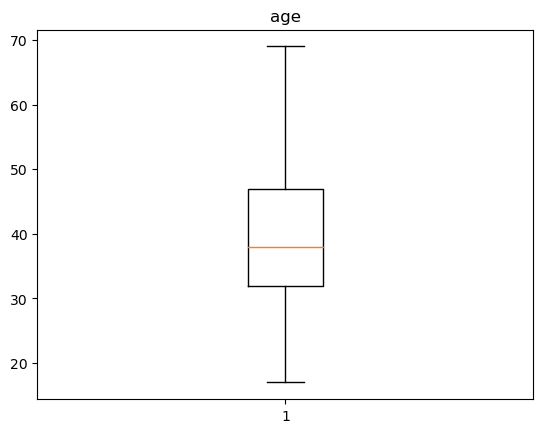

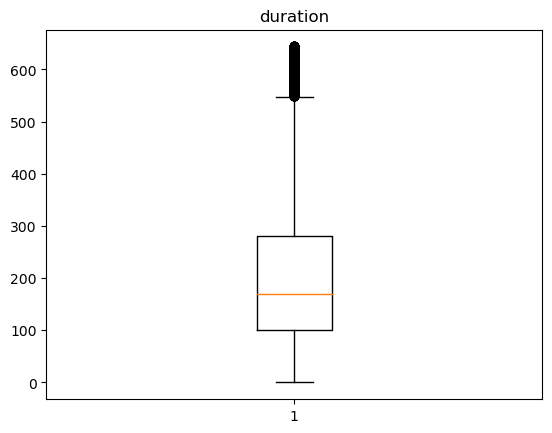

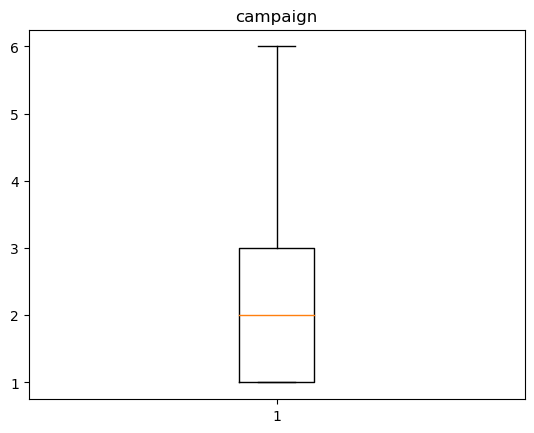

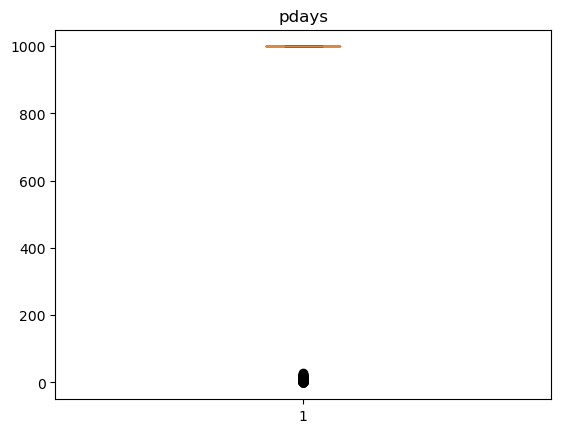

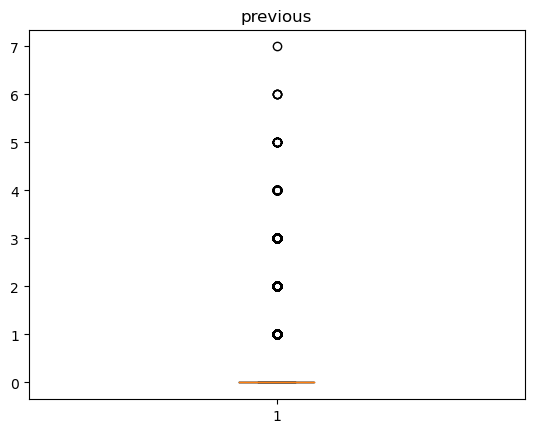

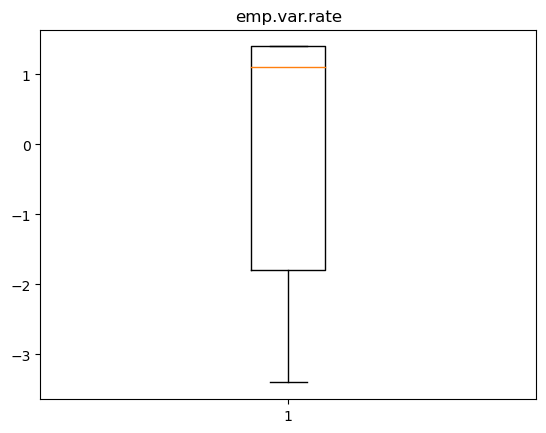

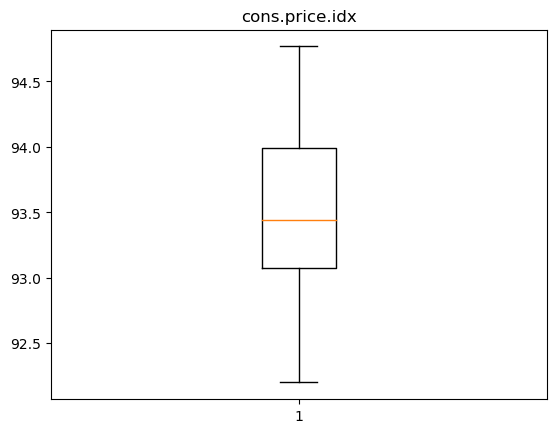

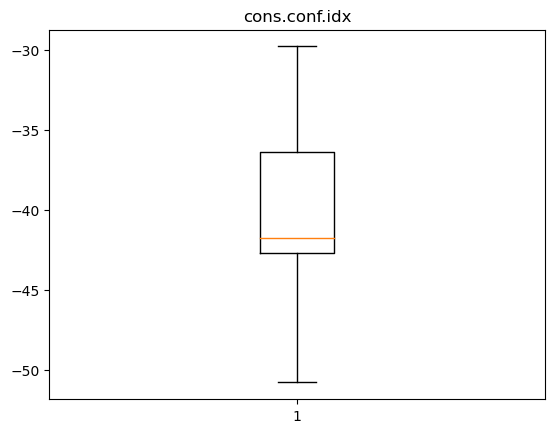

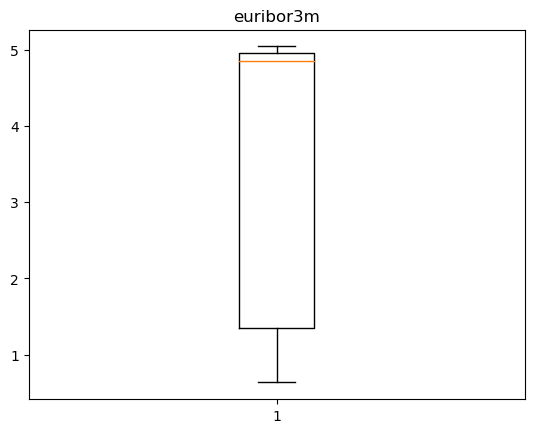

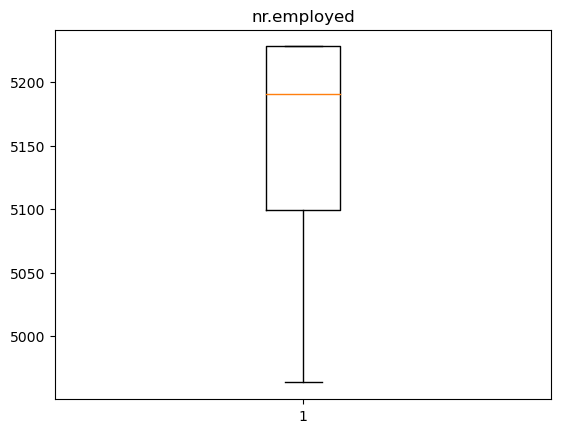

In [ ]:
for col in df.columns:
    if  df[col].dtype!="object" :
        plt.boxplot(df[col])
        plt.title(col)
        plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
for col in df.columns:
     if df[col].dtype=="object":
        df[col]=le.fit_transform(df[col])

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3,1,0,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,7,1,3,1,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,7,1,3,0,2,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,0,1,1,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,7,1,3,0,0,2,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37.0,0,1,6,0,2,0,0,7,0,...,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41182,29.0,10,2,0,0,2,0,0,7,0,...,1.0,9.0,1.0,2,-1.1,94.767,-50.8,1.028,4963.6,0
41184,46.0,1,1,5,0,0,0,0,7,0,...,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56.0,5,1,6,0,2,0,0,7,0,...,2.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35165 entries, 0 to 41186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             35165 non-null  float64
 1   job             35165 non-null  int32  
 2   marital         35165 non-null  int32  
 3   education       35165 non-null  int32  
 4   default         35165 non-null  int32  
 5   housing         35165 non-null  int32  
 6   loan            35165 non-null  int32  
 7   contact         35165 non-null  int32  
 8   month           35165 non-null  int32  
 9   day_of_week     35165 non-null  int32  
 10  duration        35165 non-null  float64
 11  campaign        35165 non-null  float64
 12  pdays           35165 non-null  float64
 13  previous        35165 non-null  float64
 14  poutcome        35165 non-null  int32  
 15  emp.var.rate    35165 non-null  float64
 16  cons.price.idx  35165 non-null  float64
 17  cons.conf.idx   35165 non-null 

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3,1,0,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,7,1,3,1,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,7,1,3,0,2,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,0,1,1,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,7,1,3,0,0,2,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37.0,0,1,6,0,2,0,0,7,0,...,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41182,29.0,10,2,0,0,2,0,0,7,0,...,1.0,9.0,1.0,2,-1.1,94.767,-50.8,1.028,4963.6,0
41184,46.0,1,1,5,0,0,0,0,7,0,...,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56.0,5,1,6,0,2,0,0,7,0,...,2.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6,0


In [ ]:
# Feature selection
# Correlation
# VIF

In [ ]:
df.corr()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.016762,-0.391334,-0.100854,0.191739,-0.005664,-0.005349,0.034921,-0.033203,-0.026799,...,0.012643,0.004257,-0.023142,0.018999,0.076681,0.041054,0.102274,0.088340,0.074006,-0.018263
job,-0.016762,1.000000,0.031943,0.142220,-0.031415,0.007615,-0.012510,-0.021930,-0.036545,0.000419,...,-0.009055,-0.026189,0.019105,0.010587,-0.000470,-0.008488,0.046472,-0.001156,-0.012086,0.023598
marital,-0.391334,0.031943,1.000000,0.106358,-0.083082,0.013370,0.005186,-0.064230,-0.012568,0.006159,...,-0.010908,-0.048035,0.048145,0.004515,-0.099130,-0.063965,-0.033756,-0.107473,-0.105750,0.064662
education,-0.100854,0.142220,0.106358,1.000000,-0.193624,0.013672,0.003972,-0.111465,-0.088087,-0.020234,...,-0.001028,-0.055519,0.043654,0.020334,-0.057126,-0.088639,0.085989,-0.049623,-0.057861,0.084367
default,0.191739,-0.031415,-0.083082,-0.193624,1.000000,-0.013665,0.000383,0.130619,-0.012913,-0.006132,...,0.023958,0.082030,-0.102442,0.022574,0.200101,0.161069,0.045235,0.191706,0.187036,-0.112272
housing,-0.005664,0.007615,0.013370,0.013672,-0.013665,1.000000,0.043047,-0.083344,-0.020588,0.001342,...,-0.009600,-0.007528,0.021192,-0.013932,-0.059711,-0.079804,-0.036152,-0.058325,-0.044891,0.014969
loan,-0.005349,-0.012510,0.005186,0.003972,0.000383,0.043047,1.000000,-0.006644,-0.002576,-0.010463,...,0.012337,-0.000353,0.000965,-0.003562,0.000100,-0.001680,-0.009488,-0.002251,0.000333,-0.007222
contact,0.034921,-0.021930,-0.064230,-0.111465,0.130619,-0.083344,-0.006644,1.000000,0.292769,-0.007871,...,0.043546,0.115705,-0.214777,0.126459,0.399120,0.604001,0.294017,0.402306,0.264713,-0.145123
month,-0.033203,-0.036545,-0.012568,-0.088087,-0.012913,-0.020588,-0.002576,0.292769,1.000000,0.036260,...,-0.033956,-0.032965,0.092854,-0.069198,-0.137305,0.034687,-0.046225,-0.080570,-0.182957,-0.022339
day_of_week,-0.026799,0.000419,0.006159,-0.020234,-0.006132,0.001342,-0.010463,-0.007871,0.036260,1.000000,...,-0.052079,-0.010495,-0.002972,0.018543,0.034629,0.006197,0.041691,0.040746,0.030968,0.013190


In [ ]:
import seaborn as sns

<Axes: >

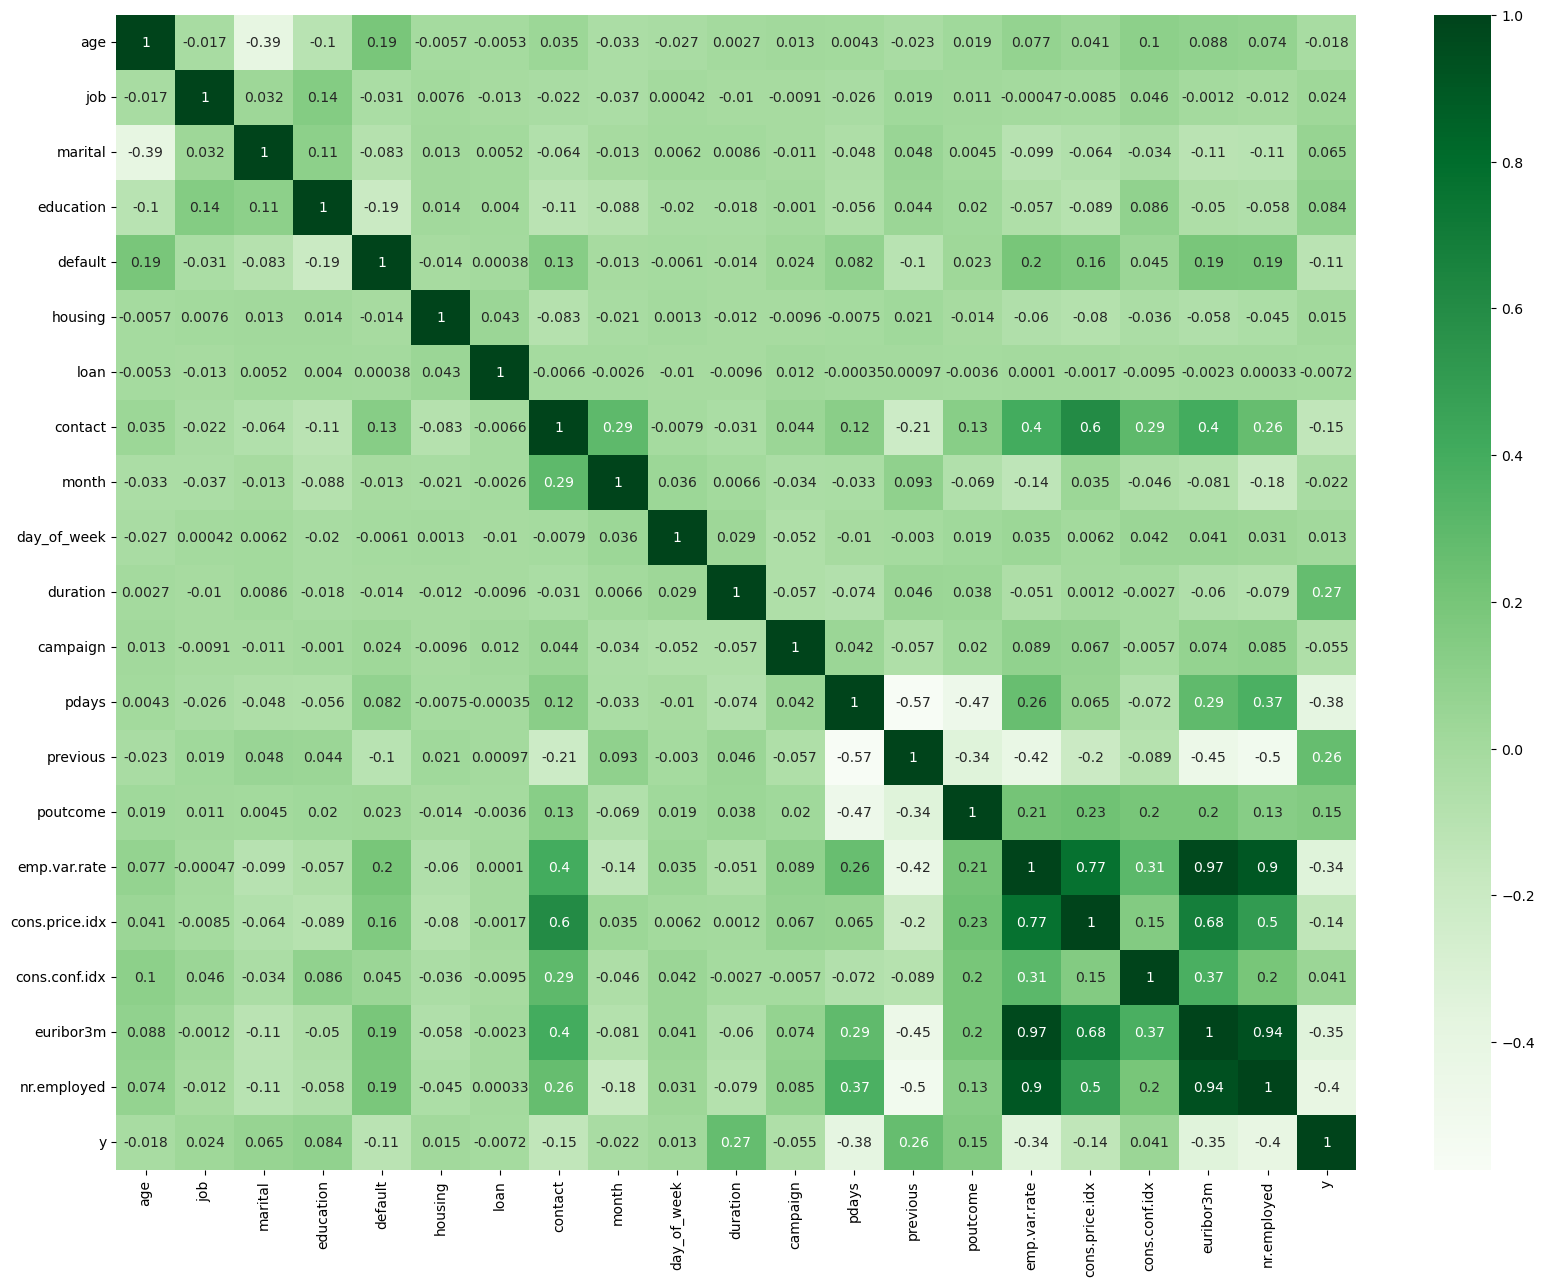

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),cmap="Greens",annot=True)

In [ ]:
# VIF-----> to check the Multicolinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
cols=[]
for i in df.columns:
    if (df[i].dtype!="object")&(i!="y"):
        cols.append(i)

In [ ]:
cols

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [ ]:
x=df[cols]

In [ ]:
x

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56.0,3,1,0,0,0,0,1,6,1,261.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
1,57.0,7,1,3,1,0,0,1,6,1,149.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
2,37.0,7,1,3,0,2,0,1,6,1,226.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
3,40.0,0,1,1,0,0,0,1,6,1,151.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
4,56.0,7,1,3,0,0,2,1,6,1,307.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37.0,0,1,6,0,2,0,0,7,0,281.0,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6
41182,29.0,10,2,0,0,2,0,0,7,0,112.0,1.0,9.0,1.0,2,-1.1,94.767,-50.8,1.028,4963.6
41184,46.0,1,1,5,0,0,0,0,7,0,383.0,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56.0,5,1,6,0,2,0,0,7,0,189.0,2.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6


In [ ]:
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["multicollinearity"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))] #to get the number of columns

In [ ]:
vif_data

,features,multicollinearity
0,age,22.113993
1,job,2.100861
2,marital,5.690071
3,education,4.560285
4,default,1.411946
5,housing,2.212409
6,loan,1.208306
7,contact,2.942422
8,month,6.685085
9,day_of_week,3.099808


In [ ]:
x.drop(["nr.employed"],axis=1,inplace=True)

C:\Users\tarun\AppData\Local\Temp\ipykernel_16416\2104229927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(["nr.employed"],axis=1,inplace=True)


In [ ]:
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["multicollinearity"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))] #to get the number of columns

In [ ]:
vif_data

,features,multicollinearity
0,age,22.107715
1,job,2.100612
2,marital,5.689362
3,education,4.558657
4,default,1.409350
5,housing,2.212084
6,loan,1.208260
7,contact,2.446094
8,month,5.784547
9,day_of_week,3.098930


In [ ]:
x.drop(["cons.price.idx"],axis=1,inplace=True)

C:\Users\tarun\AppData\Local\Temp\ipykernel_16416\440886043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(["cons.price.idx"],axis=1,inplace=True)


In [ ]:
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["multicollinearity"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))] #to get the number of columns
vif_data

,features,multicollinearity
0,age,20.980560
1,job,2.095040
2,marital,5.544426
3,education,4.503309
4,default,1.409322
5,housing,2.210417
6,loan,1.207694
7,contact,2.348235
8,month,5.726141
9,day_of_week,3.084650


In [ ]:
x.drop(["pdays"],axis=1,inplace=True)

C:\Users\tarun\AppData\Local\Temp\ipykernel_16416\1572413611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(["pdays"],axis=1,inplace=True)


In [ ]:
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["multicollinearity"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))] #to get the number of columns
vif_data

,features,multicollinearity
0,age,20.156176
1,job,2.091851
2,marital,5.426164
3,education,4.449798
4,default,1.409226
5,housing,2.206690
6,loan,1.207556
7,contact,2.274814
8,month,5.664673
9,day_of_week,3.072542


In [ ]:
x.drop(["euribor3m"],axis=1,inplace=True)

C:\Users\tarun\AppData\Local\Temp\ipykernel_16416\2707460825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(["euribor3m"],axis=1,inplace=True)


In [ ]:
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["multicollinearity"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))] #to get the number of columns
vif_data

,features,multicollinearity
0,age,17.204219
1,job,2.085747
2,marital,5.226350
3,education,4.292137
4,default,1.408832
5,housing,2.198757
6,loan,1.207316
7,contact,2.266725
8,month,5.270616
9,day_of_week,3.032416


In [ ]:
x.drop(["cons.conf.idx"],axis=1,inplace=True)

C:\Users\tarun\AppData\Local\Temp\ipykernel_16416\3496861234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(["cons.conf.idx"],axis=1,inplace=True)


In [ ]:
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["multicollinearity"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))] #to get the number of columns
vif_data

,features,multicollinearity
0,age,11.058997
1,job,2.076503
2,marital,4.372058
3,education,4.193335
4,default,1.407850
5,housing,2.162435
6,loan,1.204070
7,contact,2.242675
8,month,4.871672
9,day_of_week,2.969072


In [ ]:
x.drop(["age"],axis=1,inplace=True)

C:\Users\tarun\AppData\Local\Temp\ipykernel_16416\95384762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(["age"],axis=1,inplace=True)


In [ ]:
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["multicollinearity"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))] #to get the number of columns
vif_data

,features,multicollinearity
0,job,2.053348
1,marital,4.351772
2,education,4.013198
3,default,1.323133
4,housing,2.112544
5,loan,1.200876
6,contact,2.241469
7,month,4.605944
8,day_of_week,2.888478
9,duration,2.988925


In [ ]:
x.drop(["poutcome"],axis=1,inplace=True)

C:\Users\tarun\AppData\Local\Temp\ipykernel_16416\3877265049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(["poutcome"],axis=1,inplace=True)


In [ ]:
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["multicollinearity"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))] #to get the number of columns
vif_data

,features,multicollinearity
0,job,2.034164
1,marital,4.135585
2,education,3.788774
3,default,1.313522
4,housing,2.080645
5,loan,1.198855
6,contact,2.225619
7,month,4.490123
8,day_of_week,2.803667
9,duration,2.834777


In [ ]:
x

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate
0,3,1,0,0,0,0,1,6,1,261.0,1.0,0.0,1.1
1,7,1,3,1,0,0,1,6,1,149.0,1.0,0.0,1.1
2,7,1,3,0,2,0,1,6,1,226.0,1.0,0.0,1.1
3,0,1,1,0,0,0,1,6,1,151.0,1.0,0.0,1.1
4,7,1,3,0,0,2,1,6,1,307.0,1.0,0.0,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,0,1,6,0,2,0,0,7,0,281.0,1.0,0.0,-1.1
41182,10,2,0,0,2,0,0,7,0,112.0,1.0,1.0,-1.1
41184,1,1,5,0,0,0,0,7,0,383.0,1.0,0.0,-1.1
41185,5,1,6,0,2,0,0,7,0,189.0,2.0,0.0,-1.1


# Model implementaion

In [ ]:
# independent and dependent columns
x #independent

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate
0,3,1,0,0,0,0,1,6,1,261.0,1.0,0.0,1.1
1,7,1,3,1,0,0,1,6,1,149.0,1.0,0.0,1.1
2,7,1,3,0,2,0,1,6,1,226.0,1.0,0.0,1.1
3,0,1,1,0,0,0,1,6,1,151.0,1.0,0.0,1.1
4,7,1,3,0,0,2,1,6,1,307.0,1.0,0.0,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,0,1,6,0,2,0,0,7,0,281.0,1.0,0.0,-1.1
41182,10,2,0,0,2,0,0,7,0,112.0,1.0,1.0,-1.1
41184,1,1,5,0,0,0,0,7,0,383.0,1.0,0.0,-1.1
41185,5,1,6,0,2,0,0,7,0,189.0,2.0,0.0,-1.1


In [ ]:
y=df["y"]

In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41181    1
41182    0
41184    0
41185    0
41186    1
Name: y, Length: 35165, dtype: int32

In [ ]:
# spliting of the data for training and testing
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=100)

In [ ]:
x_train

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate
25143,4,1,6,0,0,0,0,7,3,66.0,1.0,0.0,-0.1
6878,11,0,3,1,2,0,1,6,4,107.0,3.0,0.0,1.1
31008,1,1,2,0,0,0,0,6,3,52.0,3.0,0.0,-1.8
28271,5,1,6,0,2,0,0,0,4,205.0,2.0,0.0,-1.8
38757,0,2,3,0,0,2,0,7,4,248.0,1.0,0.0,-3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19653,0,1,6,0,2,0,0,1,2,201.0,2.0,0.0,1.4
19182,3,1,0,1,2,2,0,1,3,307.0,4.0,0.0,1.4
84,9,2,6,0,0,2,1,6,1,20.0,1.0,0.0,1.1
13966,7,1,5,0,0,2,0,3,0,146.0,2.0,0.0,1.4


In [ ]:
y_train

25143    0
6878     0
31008    0
28271    0
38757    0
        ..
19653    0
19182    0
84       0
13966    0
16443    0
Name: y, Length: 24615, dtype: int32

In [ ]:
x_test

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate
26885,0,1,7,1,2,0,0,7,2,235.0,3.0,0.0,-0.1
27913,0,2,3,0,2,0,0,5,2,181.0,2.0,0.0,-1.8
34795,1,1,1,0,2,0,0,6,2,125.0,5.0,0.0,-1.8
16402,5,1,7,1,0,0,0,3,4,177.0,2.0,0.0,1.4
26280,0,2,6,0,0,0,0,7,2,166.0,1.0,0.0,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,9,0,2,0,0,0,1,6,3,244.0,1.0,0.0,1.1
35379,0,2,6,0,2,2,0,6,0,63.0,4.0,0.0,-1.8
5095,1,1,2,0,0,2,1,6,0,203.0,1.0,0.0,1.1
40036,0,0,6,0,0,0,0,3,1,128.0,2.0,0.0,-1.7


In [ ]:
y_test

26885    0
27913    0
34795    0
16402    0
26280    0
        ..
4373     0
35379    0
5095     0
40036    1
13892    0
Name: y, Length: 10550, dtype: int32

In [ ]:
# Model Building part

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model=LogisticRegression()

In [ ]:
lg_model

LogisticRegression()

In [ ]:
# Training model
lg_model.fit(x_train,y_train)

C:\Users\tarun\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Testing of model
lg_pred=lg_model.predict(x_test)
lg_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

26885    0
27913    0
34795    0
16402    0
26280    0
        ..
4373     0
35379    0
5095     0
40036    1
13892    0
Name: y, Length: 10550, dtype: int32

In [ ]:
from sklearn.metrics import *

In [ ]:
accuracy_score(y_test,lg_pred)*100

91.86729857819905

In [ ]:
cm=confusion_matrix(y_test,lg_pred)
cm

array([[9502,  209],
       [ 649,  190]], dtype=int64)

<Axes: >

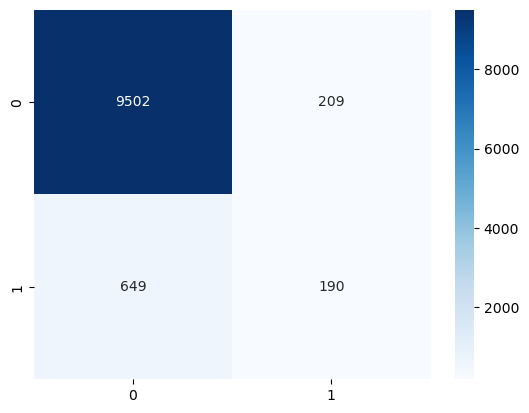

In [ ]:
sns.heatmap(cm,cmap="Blues",annot=True,fmt="d")